In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
dataset = pd.read_csv('RobustDistricts.csv')

In [3]:
states = pd.DataFrame(dataset['State'])
states

,State
0,Andhra Pradesh_Anantapur
1,Andhra Pradesh_Chittoor
2,Andhra Pradesh_East Godavari
3,Andhra Pradesh_Guntur
4,Andhra Pradesh_Krishna
...,...
546,West Bengal_Purba Medinipur
547,West Bengal_Puruliya
548,West Bengal_South 24 Parganas
549,West Bengal_Uttar Dinajpur


In [4]:
df_post = dataset.iloc[:,2:-2:2]
df_post['Post_2019'] = dataset['Post_2019']
df_post

,Post_2005,Post_2006,Post_2007,Post_2008,Post_2009,Post_2010,Post_2011,Post_2012,Post_2013,Post_2014,Post_2015,Post_2016,Post_2017,Post_2018,Post_2019
0,7.335909,9.532727,6.940227,5.965227,6.210909,5.634318,7.462955,8.520909,6.925238,8.830750,7.975897,9.937949,7.752973,10.207059,7.668824
1,6.366757,6.550270,6.009730,7.142703,8.031622,6.738824,6.714706,6.374706,6.182353,8.260294,7.591515,6.591379,5.340833,8.992609,7.654545
2,2.818286,2.977778,2.796111,3.517778,3.136667,2.512778,3.740000,2.927222,3.226571,3.681765,3.735588,3.079375,2.601333,3.013448,2.773929
3,1.930286,2.398571,2.121143,2.290000,3.054286,1.729429,2.991818,2.702727,2.223125,3.398065,4.813871,3.649655,3.919310,5.088276,3.209259
4,3.138000,3.446800,3.151200,3.039600,4.548800,3.020400,4.047600,3.055600,3.312400,3.436000,4.473200,3.810870,4.913182,4.614348,4.122609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546,5.354231,6.440000,5.007692,6.492308,7.882400,9.721154,10.276800,10.575417,10.237200,10.660417,12.184545,12.206000,10.117000,10.701000,8.883529
547,3.583158,4.360526,3.227679,3.697500,3.488462,5.624800,3.821071,3.849123,3.028333,3.065882,4.367059,3.803750,3.404118,3.872800,3.765625
548,3.176585,3.559512,3.179512,3.645610,3.971750,4.492195,4.452927,4.453171,5.011463,6.220750,6.275128,5.990263,6.388974,6.387500,6.313077
549,2.138750,3.160000,3.030769,2.462857,2.822143,2.359286,3.381429,2.870769,3.296154,3.557692,3.479231,2.278571,2.883571,3.167857,2.865714


In [5]:
X = df_post.iloc[:,0:13].values
Y = df_post.iloc[:,13].values

In [6]:
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.model_selection import KFold # import KFold
kf = KFold(n_splits=7) 
kf.get_n_splits(X) 
print(kf) 
KFold(n_splits=7, random_state=None, shuffle=False)

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2)

In [8]:
#Random_forest to predict water levels for 2020
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 100, random_state = 0)
rfr.fit(x_train, y_train)

RandomForestRegressor(random_state=0)

In [9]:
rfr_pred= rfr.predict(x_test)
rfr_pred = rfr_pred.reshape(-1,1)

In [10]:
rfr.score(x_test,y_test)

0.9699567863851911

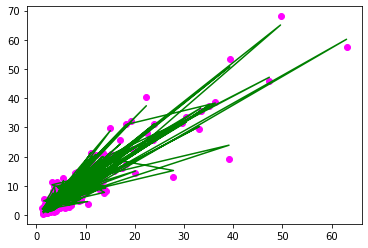

In [11]:
plt.scatter(x_train[:,0], y_train, color = 'magenta')
plt.plot(x_train[:,0], rfr.predict(x_train), color = 'green')
plt.show()

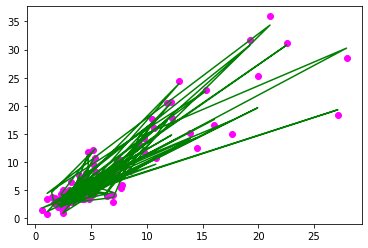

In [12]:
plt.scatter(x_test[:,0], y_test, color = 'magenta')
plt.plot(x_test[:,0], rfr.predict(x_test), color = 'green')
plt.show()

In [13]:
df_post['Post_2020'] = rfr.predict(X)


In [14]:
#Predicting it for 2021
X = df_post.iloc[:,0:14].values
Y = df_post.iloc[:,14].values

In [15]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.4)

In [16]:
rfr.fit(x_train, y_train)
rfr_pred= rfr.predict(x_test)
rfr_pred = rfr_pred.reshape(-1,1)

In [17]:
df_post['Post_2021'] = rfr.predict(X)

In [18]:
df_post

,Post_2005,Post_2006,Post_2007,Post_2008,Post_2009,Post_2010,Post_2011,Post_2012,Post_2013,Post_2014,Post_2015,Post_2016,Post_2017,Post_2018,Post_2019,Post_2020,Post_2021
0,7.335909,9.532727,6.940227,5.965227,6.210909,5.634318,7.462955,8.520909,6.925238,8.830750,7.975897,9.937949,7.752973,10.207059,7.668824,8.584023,8.822681
1,6.366757,6.550270,6.009730,7.142703,8.031622,6.738824,6.714706,6.374706,6.182353,8.260294,7.591515,6.591379,5.340833,8.992609,7.654545,7.917112,7.272477
2,2.818286,2.977778,2.796111,3.517778,3.136667,2.512778,3.740000,2.927222,3.226571,3.681765,3.735588,3.079375,2.601333,3.013448,2.773929,2.898580,2.868087
3,1.930286,2.398571,2.121143,2.290000,3.054286,1.729429,2.991818,2.702727,2.223125,3.398065,4.813871,3.649655,3.919310,5.088276,3.209259,4.752687,3.319849
4,3.138000,3.446800,3.151200,3.039600,4.548800,3.020400,4.047600,3.055600,3.312400,3.436000,4.473200,3.810870,4.913182,4.614348,4.122609,4.554264,4.133724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546,5.354231,6.440000,5.007692,6.492308,7.882400,9.721154,10.276800,10.575417,10.237200,10.660417,12.184545,12.206000,10.117000,10.701000,8.883529,12.356835,10.039161
547,3.583158,4.360526,3.227679,3.697500,3.488462,5.624800,3.821071,3.849123,3.028333,3.065882,4.367059,3.803750,3.404118,3.872800,3.765625,3.165626,3.626147
548,3.176585,3.559512,3.179512,3.645610,3.971750,4.492195,4.452927,4.453171,5.011463,6.220750,6.275128,5.990263,6.388974,6.387500,6.313077,5.432495,4.591586
549,2.138750,3.160000,3.030769,2.462857,2.822143,2.359286,3.381429,2.870769,3.296154,3.557692,3.479231,2.278571,2.883571,3.167857,2.865714,3.005502,2.962508


In [19]:
#Predicting it for 2022
X = df_post.iloc[:,0:15].values
Y = df_post.iloc[:,15].values

In [20]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.5)

In [21]:
rfr.fit(x_train, y_train)
rfr_pred= rfr.predict(x_test)
rfr_pred = rfr_pred.reshape(-1,1)

In [22]:
df_post['Post_2022'] = rfr.predict(X)

In [24]:
final_df_post = states.append(df_post, ignore_index=True)

In [25]:
final_df_post.to_csv('PostMonsoonR_districts.csv', index = False)